----
# Plot Oligodendrocyte Gene Signatures in Tumor Cells
----

We want to show which cell types are most similar to Tumour cells across patients

/cluster/projects/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/MatureOligodendrocytes

In [41]:
library(pheatmap)
library(ggplot2)
library(gridExtra)
library(ggpubr)
setwd("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/MatureOligodendrocytes")

In [4]:
meta <- readRDS("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/AstrocyteScoring/GSC_Tumours/Astrocyte_AUCell_meta_GSC_T.rds")
colnames(meta) <- gsub("Population", "AstrocytePopulation", colnames(meta))
head(meta)

,nGene,nUMI,orig.ident,percent.mito,S.Score,G2M.Score,Phase,CC.Difference,Zhong_NPCs_upreg_AUC,Zhong_Excitatory_neurons_upreg_AUC,⋯,Lin_NatNeurosci_2017_AstrocytePopulationD_AUC,Lin_NatNeurosci_2017_AstrocytePopulationE_AUC,Morel_JNeurosci_2017_CortexAstrocytes_AUC,Morel_JNeurosci_2017_HippocampusAstrocytes_AUC,Morel_JNeurosci_2017_NaccRegionAstrocytes_AUC,Morel_JNeurosci_2017_CpuRegionAstrocytes_AUC,Morel_JNeurosci_2017_ThalamusAstrocytes_AUC,Morel_JNeurosci_2017_HypothalamusAstrocytes_AUC,Chai_Neuron_2017_AdultHippocampalAstrocytes_AUC,Chai_Neuron_2017_AdultStriatumAstrocytes_AUC
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BTSC_BT127_L_AAACCTGCACGGACAA,640,875,BTSC,0.043428571,0.0957859,0.07303696,S,0.022748941,0.10663091,0.000000000,⋯,0.06105958,0.07507290,0.009066071,0.00000000,0,0.00000000,0.00000000,0,0.05691161,0.06021974
BTSC_BT127_L_AAACCTGCATCCGGGT,1036,2408,BTSC,0.002076412,0.0535880,0.30872825,G2M,-0.255140251,0.19311215,0.095520701,⋯,0.06406926,0.12230042,0.000000000,0.13607461,0,0.05402877,0.00000000,0,0.04203807,0.03468961
BTSC_BT127_L_AAACCTGGTACAGTTC,3240,10058,BTSC,0.078047326,0.2119064,-0.22082262,S,0.432729024,0.10956094,0.007489049,⋯,0.09777365,0.11890197,0.000000000,0.08760774,0,0.00000000,0.00000000,0,0.03354806,0.05416663
BTSC_BT127_L_AAACCTGTCTACGAGT,3337,10798,BTSC,0.061863308,-0.1322671,-0.20464285,G1,0.072375715,0.07132768,0.000000000,⋯,0.06800660,0.12129185,0.000000000,0.01031511,0,0.01958835,0.00000000,0,0.03333430,0.06407349
BTSC_BT127_L_AAACGGGAGTGGTAAT,4140,14601,BTSC,0.081501267,0.4082643,0.40187978,S,0.006384479,0.25821914,0.007630352,⋯,0.05124717,0.09712995,0.000000000,0.17069380,0,0.04362063,0.00000000,0,0.03858105,0.05392528
BTSC_BT127_L_AAACGGGCAGGACGTA,543,820,BTSC,0.108536585,-0.1085568,-0.14419756,G1,0.035640733,0.04803011,0.000000000,⋯,0.06792414,0.06715780,0.000000000,0.00000000,0,0.00000000,0.07699901,0,0.04619077,0.07626926


In [13]:
### subset to only tumour cells
tumour <- meta[meta$orig.ident == "GBM", ]
colnames(tumour) <- gsub("Population", "AstrocytePopulation", colnames(tumour))
tumour <- tumour[ ,grep("_AUC", colnames(tumour))]
colnames(tumour) <- gsub("_AUC", "", colnames(tumour))
dim(tumour)

### save data
saveRDS(tumour, file = "TumourCells_AUCell_GeneSignatures.rds")

[1] 14207   241

In [28]:
subset <- c(colnames(tumour)[grep("dendro", colnames(tumour))],
            colnames(tumour)[grep("OPC", colnames(tumour))],
            colnames(tumour)[grep("OL", colnames(tumour))],
            colnames(tumour)[grep("OL", colnames(tumour))],
            colnames(tumour)[grep("MOG", colnames(tumour))]
           )
subset <- tumour[ , subset]
dim(subset)

[1] 14207    16

In [37]:
### split barcodes for PatientID
### plot 2x8 grid of signatures as violing plots / sample
x <- strsplit(rownames(subset), "_")
patient <- sapply( x, "[", 2 )
patient <- strsplit(patient, "-")
patient <- sapply(patient, "[", 1 )

subset$sample <- paste0(patient, "_T")


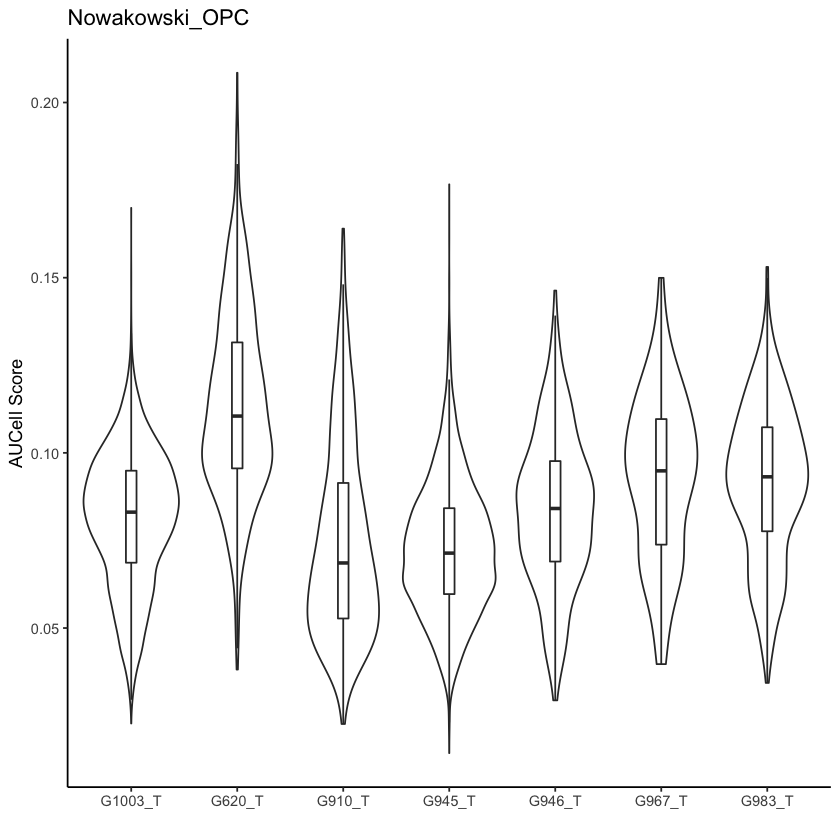

In [52]:
i <- 8

p <- 
p

In [54]:
p_list <- list()

for (i in 1:(ncol(subset) - 1)){
    
    sig <- colnames(subset)[i]
    
    p_list[[i]] <- ggplot(subset, aes_string(x="sample", y=sig)) + 
  geom_violin() + geom_boxplot(width=0.1, outlier.shape = NA) + 
  ylab("AUCell Score") + theme_classic() + ggtitle(sig) + xlab("")
    
}

[[1]]


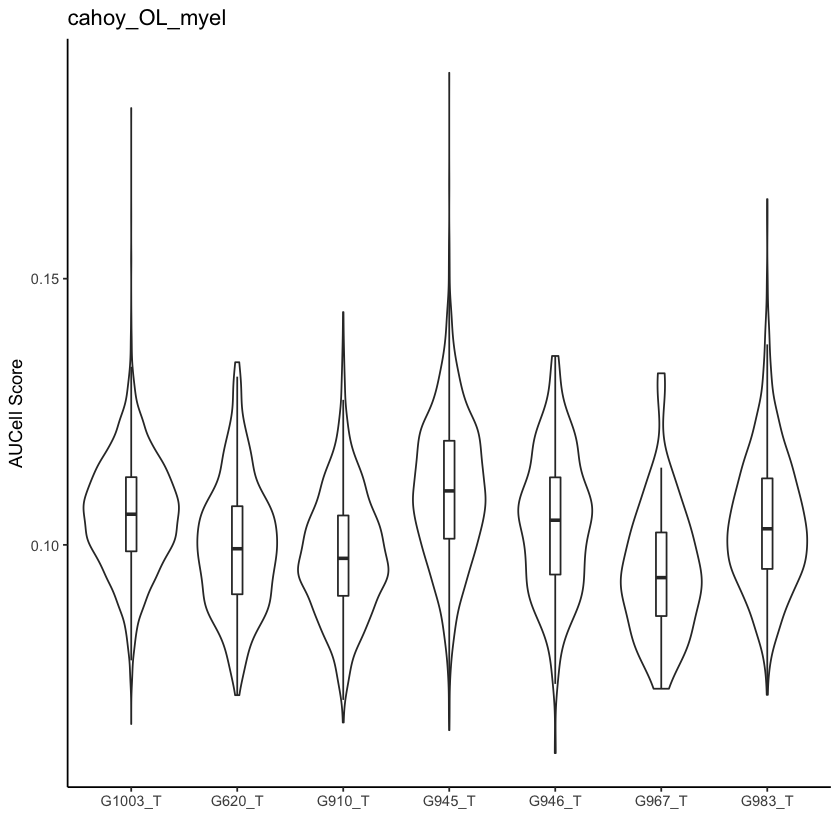